
# Sentiment Analysis

## Objective:
In this module, we aim to explore the different regression and classification models and try to analyse which model performs best on a given data.

- **1. Text Data Cleaning and Preprocessing:**
     - Remove noise such as punctuation, stopwords, and special characters.
     - Apply tokenization, stemming, and lemmatization to standardize text data.
     - Prepare the text data for further analysis and modeling.

- **2. Text Vectorization Techniques:**
     - Utilize techniques such as CountVectorizer, TF-IDF, or Doc2Vec to vectorize the cleaned text data.

- **3. Naive Bayes, KNN Models Implementation:**
    - Apply the Naive Bayes & KNN algorithms to classify text data based on the vectorized inputs.
     - Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score.

- **4. Hyperparameter Tuning :**
     - Perform hyperparameter tuning using techniques such as GridSearchCV or RandomizedSearchCV.
     - Identify the optimal set of hyperparameters that maximize the model's performance.


##1. Introduction

Sentiment analysis, often referred to as opinion mining, is a natural language processing (NLP) technique used to determine the emotional tone behind a body of text. It involves classifying text into categories like positive, negative, or neutral, thereby offering valuable insights into public opinion, customer feedback, and brand perception.

<center><img src="https://media.sproutsocial.com/uploads/2023/07/Sentiment-analysis-HUB-Final.jpg" width = 500 height = 300 /></center>

The process is crucial in various applications, such as understanding customer sentiments in reviews, monitoring social media for brand sentiment, and gauging public opinion on specific topics.

##2. Steps involved

This notebook leverages algorithms and machine learning models to transform unstructured text data into structured information, enabling the classification of text into `Positive`, `Negative`, and `Neutral` categories.

1. **Data Collection** <br>
  a. **Gather Text Data:** The data is downloded from kaggle please refer to this <a href='https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset'>link</a> for more details about the data.

  b. **Labeling Data:** Label the text data with corresponding sentiment categories such as `Positive`, `Negative`, and `Neutral`.
2. **Data Preprocessing** <br>
  a. **Text Cleaning:** Remove noise from the text, such as processing hashtags, special characters, and stopwords (e.g., "the," "and").

  b. **Tokenization:** Break down the text into individual words or tokens.

  c. **Lemmatization/Stemming:** Reduce words to their base or root form (e.g., "running" to "run").

3. **Feature Engineering**<br>
  a. **Vectorization:** Convert text data into numerical features using methods like Bag of Words (BoW), TF-IDF, or word embeddings (e.g., Word2Vec, Doc2Vec, GloVe, spacy). In this notebook, we will generate word embeddings using `Doc2Vec`.

4. **Model Selection**<br>
  a. **Choose an Algorithm:** Select a machine learning algorithm suitable for classification tasks. Common choices include Logistic Regression, Support Vector Machines (SVM), Naive Bayes, and deep learning models like RNNs or Transformers. In this notebook we will use `Naive Bayes`, `Logistic regression` and `K-Nearest Neighbors (KNN)` for classification.

  b. **Hyperparameter tunning and Model Training:** Train the selected model using the labeled data and tune hyper parameters to it's optimal performance.

5. **Model Evaluation**<br>
  a. **Performance Metrics:** Use metrics like accuracy, precision, recall, F1-score, and Confusion matrix to assess the model's effectiveness.
  We are evaluating the performance of two classification models: `Naive Bayes`, and `K-Nearest Neighbors (KNN)`. Each model is trained using different word embeddings:

  b. **Doc2Vec Embeddings:** These embeddings are generated from a model specifically trained on our sentiment analysis dataset.

Based on the observations above, we aim to draw final conclusions regarding the comparative performance of the models with different word embeddings.

In [1]:
# Import the necessary libraries
# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns  # For creating attractive and informative statistical graphics
import matplotlib.pyplot as plt  # For plotting graphs and charts

# Utility for text processing
import re

# Import the warnings module, which allows control over warning messages
import warnings

# Suppress all warnings in the script
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'seaborn'

In [ ]:

# Machine learning models and metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report,
                             precision_score, recall_score, f1_score,
                             confusion_matrix)

In [ ]:
# Importing Natural Language Processing (NLP) libraries
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Download NLTK stopwords if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# 2. Steps involved

# 2.1 Data Collection

## 2.1.1 Gather text data<br>
 The data is downloded from kaggle <a href='https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset'>link</a>

 The dataset `Social Media Sentiments Analysis` captures a vibrant tapestry of emotions, trends, and interactions across various social media platforms. This dataset provides a snapshot of user-generated content, encompassing text, timestamps, hashtags, countries, likes, and retweets. Each entry unveils unique stories—moments of surprise, excitement, admiration, thrill, contentment, and more—shared by individuals worldwide.

In [ ]:
#Load data from the csv file
sentiment_data = pd.read_csv('/content/sentimentdataset.csv')

In [ ]:
# Display the first few rows of the sentiment dataset to get an overview
sentiment_data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
# Drop the unwanted columns
sentiment_data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)
sentiment_data.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
# Display a concise summary of the sentiment dataset
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   User       732 non-null    object 
 4   Platform   732 non-null    object 
 5   Hashtags   732 non-null    object 
 6   Retweets   732 non-null    float64
 7   Likes      732 non-null    float64
 8   Country    732 non-null    object 
 9   Year       732 non-null    int64  
 10  Month      732 non-null    int64  
 11  Day        732 non-null    int64  
 12  Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 74.5+ KB


##Observation

There are no null values in the data.

Also, the columns `Text`, `Sentiment`, `Platform`, and `Hashtags` appear to be essential for our sentiment analysis. The `Text` and `Hashtags` columns will help us identify the sentiment expressed in the text, while the `Sentiment` column will serve as the label for our analysis. Additionally, the `Platform` column will provide information on the source from which the text was extracted.

In [ ]:
useful_columns = ['Text', 'Sentiment', 'Platform', 'Hashtags']

In [ ]:
# Filter the sentiment dataset to include only the relevant columns
sentiment_data = sentiment_data[useful_columns]

In [ ]:
# Display the first few rows of the sentiment dataset to get an overview
sentiment_data.head()

,Text,Sentiment,Platform,Hashtags
0,Enjoying a beautiful day at the park! ...,Positive,Twitter,#Nature #Park
1,Traffic was terrible this morning. ...,Negative,Twitter,#Traffic #Morning
2,Just finished an amazing workout! 💪 ...,Positive,Instagram,#Fitness #Workout
3,Excited about the upcoming weekend getaway! ...,Positive,Facebook,#Travel #Adventure
4,Trying out a new recipe for dinner tonight. ...,Neutral,Instagram,#Cooking #Food


## 2.1.2 Labeling Data<br>
 Our sentiment dataset includes a range of sentiments like `surprise`, `excitement`, `admiration`, `thrill`, `contentment`, and others, we are manually going to group them into the broader categories of `Positive`, `Negative`, and `Neutral` for simplicity and effective analysis.


In [ ]:
# Check the values in 'Sentiment' column
sentiment_data['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

### Observation:

There are multiple entries but we want to categorize our sentiments primarily into 3 classes - `positive`, `negative` and `neutral`.

In [ ]:
sentiment_classification = {
    # Positive sentiments generally reflect feelings of joy, happiness, and appreciation.
    "Positive": [
        "Positive", "Happiness", "Joy", "Excitement", "Love", "Amusement", "Enjoyment", "Admiration",
        "Affection", "Awe", "Contentment", "Serenity", "Gratitude", "Hope", "Empowerment", "Compassion",
        "Tenderness", "Arousal", "Enthusiasm", "Fulfillment", "Reverence", "Elation", "Euphoria",
        "Curiosity", "Anticipation", "Determination", "Pride", "Zest", "Hopeful", "Proud", "Grateful",
        "Empathetic", "Compassionate", "Playful", "Free-spirited", "Inspired", "Confident", "Harmony",
        "Creativity", "Radiance", "Wonder", "Rejuvenation", "Inspiration", "Coziness", "Adventure",
        "Blessed", "Satisfaction", "Reflection", "Accomplishment", "Wonderment", "Optimism", "Success",
        "Positivity", "Kindness", "Friendship", "Romance", "Captivation", "Tranquility", "Grandeur",
        "Emotion", "Energy", "Celebration", "Charm", "Ecstasy", "Colorful", "Hypnotic", "Connection",
        "Iconic", "Journey", "Engagement", "Heartwarming", "Renewed Effort", "Breakthrough",
        "Harmony", "Thrilling Journey", "Vibrancy", "Mesmerizing", "Culinary Adventure", "Winter Magic",
        "Thrilling Journey", "Nature's Beauty", "Celestial Wonder", "Creative Inspiration",
        "Runway Creativity", "Ocean's Freedom", "Whispers of the Past"
    ],
    # Negative sentiments often indicate discomfort, sadness, or dissatisfaction.
    "Negative": [
        "Negative", "Anger", "Fear", "Sadness", "Disgust", "Disappointed", "Bitter", "Confusion",
        "Shame", "Despair", "Grief", "Loneliness", "Jealousy", "Resentment", "Frustration", "Boredom",
        "Anxiety", "Intimidation", "Helplessness", "Regret", "Despair", "Loss", "Heartache", "Solitude",
        "Heartbreak", "Betrayal", "Suffering", "EmotionalStorm", "Isolation", "Melancholy", "Exhaustion",
        "Sorrow", "Darkness", "Desperation", "Ruins", "Desolation", "Regret", "Obstacle", "Pressure",
        "Miscalculation", "Challenge", "Sympathy", "Obstacle", "Pressure", "Embarrassed", "Mischievous",
        "Sad", "Hate", "Bad"
    ],
    # Neutral sentiments include those that do not clearly indicate a positive or negative emotion.
    "Neutral": [
        "Neutral", "Surprise", "Calmness", "Indifference", "Acceptance", "Anticipation", "Curiosity",
        "Serenity", "Numbness", "Ambivalence", "Kind", "Indifference", "Confusion", "PlayfulJoy",
        "Mindfulness", "DreamChaser", "Elegance", "Whimsy", "Pensive", "Adventure", "Wonder", "Marvel",
        "JoyfulReunion", "Nostalgia", "Serenity", "Confusion", "Whispers of the Past", "Relief", "Neutral"
    ]
}

In [ ]:
# Initialize an empty dictionary to map individual sentiments to their corresponding categories
sentiment_map = {}

# Iterate through each category and its associated sentiments in the sentiment_classification dictionary
for key, values in sentiment_classification.items():
    # Iterate through each sentiment in the current category
    for value in values:
        # Map the sentiment to its corresponding category
        sentiment_map[value] = key

In [ ]:
# Update the 'Sentiment' column in the sentiment_data DataFrame by mapping each sentiment to its category
sentiment_data['Sentiment'] = sentiment_data['Sentiment'].apply(
    # Apply a lambda function to each value in the 'Sentiment' column
    lambda x: sentiment_map.get(x.strip(), 'Neutral')  # Strip any leading/trailing whitespace and map the sentiment to its category; default to 'Neutral' if not found
)

In [ ]:
# Display the unique values in the 'Sentiment' column
sentiment_data['Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [ ]:
sentiment_data.head()

,Text,Sentiment,Platform,Hashtags
0,Enjoying a beautiful day at the park! ...,Positive,Twitter,#Nature #Park
1,Traffic was terrible this morning. ...,Negative,Twitter,#Traffic #Morning
2,Just finished an amazing workout! 💪 ...,Positive,Instagram,#Fitness #Workout
3,Excited about the upcoming weekend getaway! ...,Positive,Facebook,#Travel #Adventure
4,Trying out a new recipe for dinner tonight. ...,Neutral,Instagram,#Cooking #Food


### Checking the distribution of these sentiments:

Lets create a histogram to check the distribution.

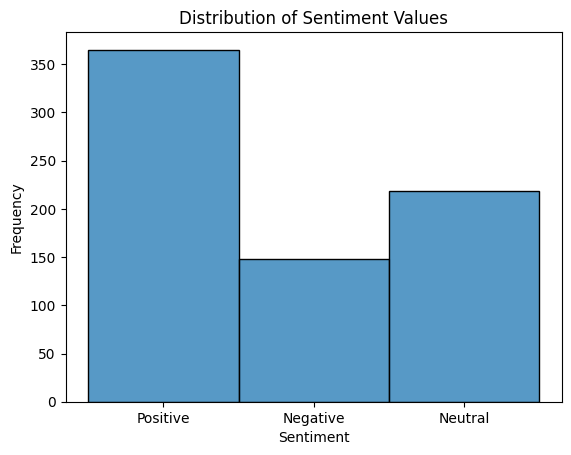

In [ ]:
# Plot a histogram of sentiment values in the dataset
sns.histplot(sentiment_data['Sentiment'])

# Add labels and title for better readability
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Values')

# Display the plot
plt.show()

### Observation:
- The Positive category has the highest frequency, indicating that most sentiments in the dataset are positive.

#2.2 Data Preprocessing

## 2.2.1 Text Cleaning<br>
Text cleaning involves preparing raw text by removing unwanted elements such as punctuation,  hashtags, numbers, and extra whitespace. It also includes converting text to lowercase and expanding contractions to ensure consistency and clarity. This process helps make the text data uniform and ready for analysis or modeling.

Here's a brief overview of the functions used in this part of text cleaning:

1. **`strip()`**:
   - Removes leading and trailing whitespace from the string.
   - Example: `"   Hello   " -> "Hello"`.

2. **`split()`**:
   - Splits a string into a list where each word is a list item.
   - Example: `"Hello World"` -> `["Hello", "World"]`.

3. **`' '.join()`**:
   - Joins elements of a list into a single string, with a specified separator (in this case, a space).
   - Example: `["Hello", "World"] -> "Hello World"`.

4. **`lower()`**:
   - Converts all characters in a string to lowercase.
   - Example: `"Hello World"` -> `"hello world"`.

5. **`re.sub(pattern, repl, string)`**:
   - A function from the `re` (regular expression) module, used to replace occurrences of a pattern in a string with a specified replacement.
   - The first use, `re.sub(r'[^\w\s]', '', text)`, removes any character that is not a word character (letters, digits, and underscores) or whitespace.
   - The second use, `re.sub(r'\d+', '', text)`, removes any sequences of digits.

In [ ]:
sentiment_data.loc[0, 'Text'].strip().split()

['Enjoying', 'a', 'beautiful', 'day', 'at', 'the', 'park!']

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk import word_tokenize
word_tokenize(sentiment_data.loc[0, 'Text'])

['Enjoying', 'a', 'beautiful', 'day', 'at', 'the', 'park', '!']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords # generic English Stopwords
sw = stopwords.words('english')
sw.extend(['!', ',', '?'])

In [ ]:
for each_token in word_tokenize(sentiment_data.loc[0, 'Text']):
  if each_token not in sw:
    print(each_token)

Enjoying
beautiful
day
park


In [ ]:
def clean_text(text):
    # Remove white space
    text = ' '.join(text.strip().split())

    # Convert to lowercase
    text = text.lower()

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\d+', '', text)      # Remove numbers

    # ew123

    return text

In [ ]:
print(f"Before text cleaning: {sentiment_data['Text'].iloc[0]}")
print(f"After text cleaning: {clean_text(sentiment_data['Text'].iloc[0])}")

Before text cleaning:  Enjoying a beautiful day at the park!              
After text cleaning: enjoying a beautiful day at the park


In [ ]:
# Apply the clean_text function to the 'Text' column
sentiment_data['Text'] = sentiment_data['Text'].apply(clean_text)

# Apply the clean_text function to the 'Hashtags' column
sentiment_data['Hashtags'] = sentiment_data['Hashtags'].apply(clean_text)

In [ ]:
# Display the first few rows of the 'Text' and 'Hashtags' columns
sentiment_data[['Text', 'Hashtags']].head()

,Text,Hashtags
0,enjoying a beautiful day at the park,nature park
1,traffic was terrible this morning,traffic morning
2,just finished an amazing workout,fitness workout
3,excited about the upcoming weekend getaway,travel adventure
4,trying out a new recipe for dinner tonight,cooking food


## 2.2.2 Tokenization<br>
Tokenization is the process of breaking down text into smaller units, such as words or phrases, called tokens. This step is crucial in natural language processing (NLP) as it transforms continuous text into a structured format that can be analyzed. Tokenization helps in understanding and processing text data by converting it into a list of meaningful components, which are essential for various NLP tasks like text analysis, sentiment analysis, and machine learning.

<center><img src="https://wisdomml.in/wp-content/uploads/2022/08/tokenizer.jpg" width=500 height=300/></center>

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('receiving')

'receiv'

In [ ]:
from nltk.stem import SnowballStemmer
sb = SnowballStemmer('english')
sb.stem('receiving')

'receiv'

In [ ]:
# Function for Tokenization
def tokenizer(text):

    # Convert text to tokens
    tokens = word_tokenize(text)

    # Return the list of tokens
    return tokens

In [ ]:
tokenizer(sentiment_data['Text'].iloc[0])
print(f"Before tokenization: {sentiment_data['Text'].iloc[0]}")
print(f"After tokenization: {tokenizer(sentiment_data['Text'].iloc[0])}")

Before tokenization: enjoying a beautiful day at the park
After tokenization: ['enjoying', 'a', 'beautiful', 'day', 'at', 'the', 'park']


## 2.2.3 Lemmatization/Stemming<br>
Lemmatization and Stemming are techniques used in natural language processing (NLP) to reduce words to their base or root form, helping to standardize and simplify text data for analysis.

**Stemming:** This technique involves cutting off the end of words to reduce them to their root form, often resulting in non-standard words. For example, "running," "runner," and "ran" might all be reduced to "run." Stemming is a more aggressive approach and can sometimes produce words that are not real or meaningful.

**Lemmatization:** Unlike stemming, lemmatization considers the context and part of speech to reduce words to their base or dictionary form, known as the lemma. For example, "running" would be reduced to "run," but "better" would be reduced to "good." Lemmatization is more accurate and produces meaningful base forms of words.

Both techniques are used to normalize text data, making it easier to match similar words during analysis, such as in search engines, sentiment analysis, and other NLP tasks.

<center><img src="https://techgenizer.netlify.app/img/blog15/lm1.png" width=500 height = 200/></center>

In [ ]:
l = []
for each_token in word_tokenize(sentiment_data.loc[0, 'Text']):
  l.append(ps.stem(each_token))

' '.join(l) # Stememd String

'enjoy a beauti day at the park'

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
from nltk import pos_tag
pos_tag(word_tokenize(sentiment_data.loc[0, 'Text']))

[('enjoying', 'VBG'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('day', 'NN'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('park', 'NN')]

In [ ]:
# Function for Stemming
def stem_text(text):
    # Tokenize text
    tokens = tokenizer(text)

    # Initialize the stemmer
    stemmer = PorterStemmer()

    # Apply stemming to the word
    return " ".join([stemmer.stem(token) for token in tokens])


from nltk.stem import WordNetLemmatizer
# Function for Lemmatization
def lemmatize_text(text, pos='v'):
    # Tokenize text
    tokens = tokenizer(text)

    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Apply lemmatization to the word with a specified part of speech
    return " ".join([lemmatizer.lemmatize(token, pos=pos) for token in tokens])

In [ ]:
print(f"Before stemming: {sentiment_data['Text'].iloc[0]}")
print(f"After stemming: {stem_text(sentiment_data['Text'].iloc[0])}")

Before stemming: enjoying a beautiful day at the park
After stemming: enjoy a beauti day at the park


In [ ]:
print(f"Before lemmatization: {sentiment_data['Text'].iloc[0]}")
print(f"After lemmatization: {lemmatize_text(sentiment_data['Text'].iloc[0])}")

Before lemmatization: enjoying a beautiful day at the park
After lemmatization: enjoy a beautiful day at the park


### Applying these changes in the dataset

In [ ]:
# Apply the stemming function to the 'Text' column
sentiment_data['Text'] = sentiment_data['Text'].apply(stem_text)

# Apply the lemmatization function to the 'Text' column
#sentiment_data['Text'] = sentiment_data['Text'].apply(lemmatize_text)

# Apply the stemming function to the 'Hashtags' column
sentiment_data['Hashtags'] = sentiment_data['Hashtags'].apply(stem_text)

# Apply the lemmatization function to the 'Hashtags' column
#sentiment_data['Hashtags'] = sentiment_data['Hashtags'].apply(lemmatize_text)

# Combine the cleaned 'Text' and 'Hashtags' columns into a single column by concatenating them with a space in between
sentiment_data['Text'] = sentiment_data['Text'] + ' ' + sentiment_data['Hashtags']
sentiment_data.head()

,Text,Sentiment,Platform,Hashtags
0,enjoy a beauti day at the park natur park,Positive,Twitter,natur park
1,traffic wa terribl thi morn traffic morn,Negative,Twitter,traffic morn
2,just finish an amaz workout fit workout,Positive,Instagram,fit workout
3,excit about the upcom weekend getaway travel a...,Positive,Facebook,travel adventur
4,tri out a new recip for dinner tonight cook food,Neutral,Instagram,cook food


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # Term Frequency
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDf

#2.3 Feature Engineering
Feature engineering in NLP is the process of transforming raw text data into meaningful features that can be leveraged by machine learning models. This step is essential for preparing text data for effective analysis.

In this notebook, we will generate `vector embeddings` using two distinct approaches: first, we will train our own vector model using `Doc2Vec` to generate `vector embeddings`. These techniques will help us capture the semantic essence of the text for further analysis.

<center><img src="https://datasciencedojo.com/wp-content/uploads/vector-embedding-model.webp" width = 500 height = 300 /></center>

`Vector embeddings` in NLP are numerical representations of words or phrases that capture their meanings and relationships. By converting text into dense, continuous vectors, embeddings enable machine learning models to process and understand text more effectively. Popular techniques include Word2Vec, GloVe, and contextual models like BERT, each offering different approaches to capturing semantic and contextual information. These embeddings are crucial for tasks such as text classification, information retrieval, and machine translation.

## 2.3.1 Vector embedding using doc2vec<br>
Doc2Vec is an extension of Word2Vec that generates vector representations for entire documents, rather than just individual words. Unlike traditional bag-of-words models, which treat documents as unordered collections of words, Doc2Vec captures the context and sequence of words, resulting in richer and more informative vectors.

Here is an overview of the process that we are performing.

- **`TaggedDocument`**: This is a data structure used by the `gensim` library, typically for training models like Doc2Vec. It contains two main elements:
  - `words`: A list of tokens (words) from the document.
  - `tags`: A list of identifiers (usually strings or integers) that uniquely identify each document.

- **`word_tokenize(doc.lower())`**: This part of the code converts each document's text to lowercase and tokenizes it into individual words (or tokens).

- **`tags=[str(i)]`**: Here, `i` is the index of the document in the `sentiment_data['Text']` DataFrame column. By wrapping it in `str(i)`, it converts the index `i` to a string and assigns it as a tag to the corresponding document. This tag serves as a unique identifier for the document.

## 2.3.2 Why use doc2vec?<br>

Doc2Vec is particularly useful when you need to represent entire documents or larger text bodies as vectors, especially when these vectors will be used as features in machine learning models or for similarity measures between documents. It's commonly applied in:

**Document Classification:** Classifying documents into categories like spam detection, sentiment analysis, or topic categorization.

**Document Clustering:** Grouping similar documents together based on their content.

**Information Retrieval:** Finding documents similar to a query document.

In summary, Doc2Vec is a powerful tool for generating document-level embeddings, capturing the semantic essence of a text. Its ability to handle variable-length documents and produce dense vector representations makes it an invaluable asset in many NLP applications.

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [ ]:
# Doc3Vec --> Gensim Library
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
# Preprocess and tag the documents
tagged_data = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[str(i)])
                for i, doc in enumerate(sentiment_data['Text'])]

tagged_data[:5]

NameError: name 'sentiment_data' is not defined

### Interpretation:

- In the output, each `TaggedDocument` has a `tags` value like `['0']`, `['1']`, `['2']`, etc.
- These tags correspond to the document's position in the `sentiment_data['Text']` list. For example:
  - The first document `"Enjoy a beautiful day at the park"` is tokenized and assigned the tag `['0']`.
  - The second document `"Traffic was terrible this morning"` is tokenized and assigned the tag `['1']`.
  - This continues for each document in the dataset.

### Purpose of Tags:

- **Unique Identification**: Tags uniquely identify each document within the dataset. This is particularly useful when training models like Doc2Vec, where the model needs to differentiate between different documents.
- **Index Reference**: By tagging documents with their index, you can easily reference or retrieve the original document using this tag.

### Training the tagged data on Doc2Vec to create embeddings

###Key Parameters in Doc2Vec

a. **vector_size:**

**Description:** Specifies the dimensionality of the feature vectors. Higher dimensions can capture more information but require more computational resources.
Typical Values: 100-300 are common, but this can vary depending on the task and the amount of training data.

b. **window:**

**Description:** Defines the maximum distance between the current and predicted word within a sentence. A larger window size considers more context, while a smaller size focuses on local context.
**Typical Values:** Usually set between 5-10.

c. **min_count:**

**Description:** Ignores all words with a total frequency lower than this threshold. This helps in reducing the noise caused by infrequent words.
**Typical Values:** Commonly set to 1-5, depending on the dataset size.

d. **dm (Distributed Memory):**

**Description:** Determines the training algorithm. If dm=1, it uses the Distributed Memory version of Doc2Vec (PV-DM), which maintains the context of words across the document. If dm=0, it uses Distributed Bag of Words (PV-DBOW), which is similar to Skip-Gram in Word2Vec.
**Typical Values:** dm=1 for PV-DM, dm=0 for PV-DBOW.

e. **epochs:**

**Description:** Number of iterations (epochs) over the corpus. More epochs typically improve the model, but too many can lead to overfitting.
**Typical Values:** 10-20 epochs are common, but this can be adjusted based on the dataset size and complexity.

f. **alpha and min_alpha:**

**Description:** The initial learning rate (alpha) and the minimum learning rate (min_alpha). The learning rate decreases over time, and these parameters control the speed and decay.
**Typical Values:** alpha=0.025 and min_alpha=0.0001 are typical starting values.

g. **negative:**

**Description:** If >0, negative sampling is used. The value specifies the number of "noise words" that should be drawn for each word in the training data.
**Typical Values:** negative=5 is common, but this can vary depending on the specific task.

h. **hs (Hierarchical Softmax):**

**Description:** If hs=1, hierarchical softmax is used for training the model. It’s an alternative to negative sampling, and both methods are mutually exclusive.
**Typical Values:** hs=0 for negative sampling (default), hs=1 for hierarchical softmax.

In [ ]:
# Initialize the Doc2Vec model
vector_model_doc2vec = Doc2Vec(vector_size=100, min_count = 1, epochs=100, dm=1)

# Build the vocabulary from the tagged documents
vector_model_doc2vec.build_vocab(tagged_data)

# Train the model on the data
vector_model_doc2vec.train(tagged_data, total_examples=vector_model_doc2vec.corpus_count,
                           epochs=vector_model_doc2vec.epochs)

NameError: name 'Doc2Vec' is not defined

In [ ]:
# Function for using Doc2Vec
def text_to_vector_doc2vec(text):
    """
    Convert a text string into a vector representation using a Doc2Vec model.

    Parameters:
    - text (str): The input text that needs to be converted to a vector.

    Returns:
    - vector (numpy.ndarray): The vector representation of the input text.
    """
    # Tokenize the input text into a list of tokens
    tokens = tokenizer(text)

    # Infer the vector representation of the tokenized text using the Doc2Vec model
    vector = vector_model_doc2vec.infer_vector(tokens)

    # Return the vector representation
    return vector


In [ ]:
# Using Doc2Vec to create the vectors
# Note: You shall also use spaCy here instead of Doc2Vec
print(f"Text for vectorization: {sentiment_data['Text'].iloc[0]}")
print(f"Text to vector: {text_to_vector_doc2vec(sentiment_data['Text'].iloc[0])}")

Text for vectorization: enjoy a beauti day at the park natur park
Text to vector: [-1.82287425e-01 -4.58804853e-02  5.26155299e-03  1.24215528e-01
 -3.68595272e-02  8.09731185e-02  3.25890154e-01  1.37354046e-01
 -2.33907299e-03 -9.52287167e-02 -2.84175426e-01  8.26202258e-02
  2.03619227e-01  1.93138607e-02  3.56806698e-03  2.07216412e-01
  3.96990357e-03 -3.05404842e-01  2.96922535e-01 -4.01592642e-01
  2.03634799e-01  1.31555766e-01  6.44972682e-01 -2.79816449e-01
  1.94774747e-01 -2.16531500e-01 -2.71807253e-01 -8.79754275e-02
 -1.71353906e-01  5.11752404e-02  2.12559000e-01  4.17927135e-04
  1.41894579e-01  1.43382341e-01 -7.41826044e-03  3.24157089e-01
 -2.96243101e-01  9.00437962e-03 -8.13309029e-02 -1.58287704e-01
  3.13060910e-01  1.20990790e-01 -9.47817191e-02 -1.23833582e-01
 -6.55676052e-02 -2.29586676e-01 -2.64455736e-01 -1.17830873e-01
 -3.47777549e-03  1.05903037e-01 -2.15161815e-01 -4.43308055e-01
 -3.39397788e-01 -4.44101065e-01  1.28694177e-01  1.51513234e-01
 -1.3973

In [ ]:
# Convert the text data into vector representations using the Doc2Vec model
X_vector_data_doc2vec = np.array([text_to_vector_doc2vec(text) for text in sentiment_data['Text']])

# Convert the sentiment labels into a NumPy array
Y_data = np.array(sentiment_data['Sentiment'].tolist())

Y_data[:5]

array(['Positive', 'Negative', 'Positive', 'Positive', 'Neutral'],
      dtype='<U8')

# 2.4 Model Building

## 2.4.1.1 Naive Bayes Algorithm

- Naive Bayes is a simple yet effective probabilistic machine learning algorithm used for classification tasks.
- It is based on Bayes' Theorem and assumes that the features in a dataset are independent of each other, given the class label—an assumption known as "naive."
- Despite this simplification, Naive Bayes performs well in many real-world scenarios, particularly in text classification problems like spam detection or sentiment analysis.
- The algorithm calculates the probability of each class and selects the one with the highest probability as the prediction.
- Its efficiency and effectiveness, especially with large datasets, make it a popular choice in various applications.

<center><img src="https://insightimi.wordpress.com/wp-content/uploads/2020/04/unnamed-1.png" width=500 height=300/></center>

In [ ]:
0.2 * 732

146.4

In [ ]:
from sklearn.naive_bayes import Gaussian NB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vector_data_doc2vec, Y_data,
                                                    test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes model
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

y_pred

array(['Positive', 'Positive', 'Neutral', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Neutral', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Neutral', 'Negative', 'Positive',
       'Negative', 'Negative', 'Neutral', 'Positive', 'Neutral',
       'Negative', 'Neutral', 'Positive', 'Neutral', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Neutral', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Neutral', 'Negative', 'Neutral', 'Positive', 'Negative',
       

### Evaluating the Model

In [ ]:
# Defining a function to plot the confusion matrix
from sklearn.metrics import confusion_matrix
def confusion_matrix_plot(y_true, y_pred,
                          labels=['Positive', 'Negative', 'Neutral']):
    """
    Plots the confusion matrix for the given true and predicted labels.

    Parameters:
    - y_true: array-like of shape (n_samples,) - True labels.
    - y_pred: array-like of shape (n_samples,) - Predicted labels.
    - labels: list of str (default=['Positive', 'Negative', 'Neutral']) - List of label names
              corresponding to the classes in the same order as the numeric labels.

    Returns:
    - None - This function directly plots the confusion matrix.
    """

    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Set the size of the plot
    plt.figure(figsize=(8, 6))

    # Create a heatmap to visualize the confusion matrix
    # - annot=True: Annotates each cell with the numerical value
    # - fmt='d': Formats the annotations as integers
    # - cmap='Blues': Uses a blue color map for the heatmap
    # - xticklabels and yticklabels: Labels for the x and y axes based on the provided labels
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

    # Set the label for the x-axis
    plt.xlabel('Predicted Label')

    # Set the label for the y-axis
    plt.ylabel('True Label')

    # Set the title of the plot
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()

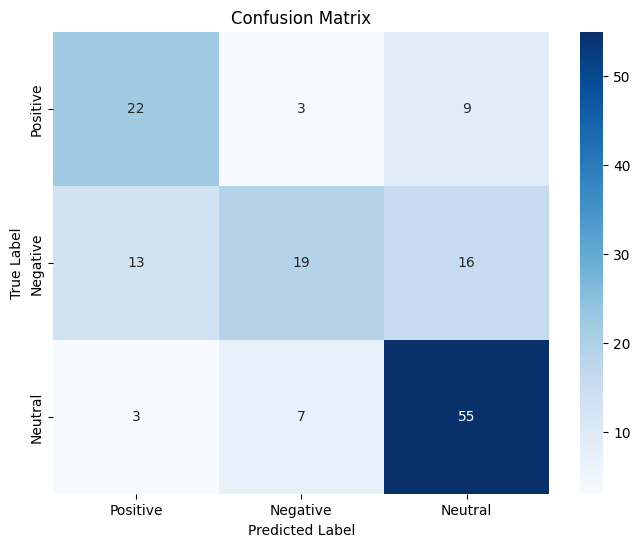

In [ ]:
# Confusion Matrix Plot
confusion_matrix_plot(y_test, y_pred)

### Interpretation:
- The model accurately predicted the `Neutral` class 56 times, which is the highest among all classes, indicating good performance for this category.
- The model did not confuse any `Positive` instances as `Negative`, which is a positive aspect of its performance.
- While the model performs well with the `Neutral` class, there are considerable misclassifications in the `Positive` and `Negative` classes, suggesting that further tuning or more training data may be necessary to improve the accuracy for those classes.


In [ ]:
# Evaluate the performance of the classification model using the true and predicted labels
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.58      0.65      0.61        34
     Neutral       0.66      0.40      0.49        48
    Positive       0.69      0.85      0.76        65

    accuracy                           0.65       147
   macro avg       0.64      0.63      0.62       147
weighted avg       0.65      0.65      0.64       147



### Interpretation:
- The model struggles with recall for `Negative` and `Neutral`  classes, indicating it frequently misses true instances of these classes.
- The `Negative` class has decent precision  but low recall, while the `Positive` class has high recall  but lower precision , suggesting an imbalance between precision and recall across classes.
- The F1-scores for `Negative` and `Neutral` show that the model's overall performance in these classes is balanced but not optimal, reflecting challenges in classifying these sentiments accurately.

# 2.5 Hyperparameter Tuning

Hyperparameter tuning is the process of finding the best set of hyperparameters for a machine learning model to optimize its performance.

<center><img src="https://www.oreilly.com/api/v2/epubs/9781789345803/files/assets/f704ea35-39ed-47f6-be62-815e893ee5fd.png" width=500 geight =200/></center>

### What Are Hyperparameters?

Hyperparameters are settings or configurations that you, as a user, specify before training a machine learning model. They are different from parameters, which are learned from the data during training. Hyperparameters control how the model learns and makes predictions, and they can significantly influence the model's performance. It helps you find the optimal settings that give your model the best performance on unseen data.

For example,

- **Alpha** (in Naive Bayes): A smoothing parameter that prevents the model from assigning zero probability to unseen words.


### How Is Hyperparameter Tuning Done?

1. **Manual Search**:
   - Manually experimenting with different hyperparameter values and observing the model’s performance.
   - This method is straightforward but can be time-consuming and inefficient, especially with many hyperparameters.

2. **Grid Search**:
   - A systematic way to try every combination of hyperparameters from a predefined grid of possible values.
   - GridSearchCV, for example, automates this process by training and evaluating the model for each combination using cross-validation.

3. **Random Search**:
   - Instead of trying every possible combination, random search samples a fixed number of hyperparameter combinations from the grid. It’s more efficient than grid search, especially when the hyperparameter space is large.

There are a few other methods too.

### How to Measure Performance?

During hyperparameter tuning, the model's performance is typically evaluated using **cross-validation**. This involves splitting the data into multiple folds, training on some folds, and testing on the remaining ones. The process is repeated multiple times to ensure reliable performance estimates. The average performance across the folds is used to judge which set of hyperparameters is best.

<center><img src="https://miro.medium.com/v2/resize:fit:886/1*PpFIzhckhq9qFAEbwrXY2g.png" width=500 height=350/></center>





### Grid Search CV


**GridSearchCV** is a tool that helps find the best set of hyperparameters for a machine learning model.

In our case, where the model is struggling with classifying `Positive` and `Negative` sentiments correctly, GridSearchCV can be used to fine-tune the hyperparameters to improve the model’s ability to distinguish between these classes.

### **Why Use GridSearchCV?**

- **Systematic Search**: Manually trying out different combinations of hyperparameters is time-consuming and prone to errors. GridSearchCV automates this process by systematically searching through all possible combinations of specified hyperparameters.


### **How Does GridSearchCV Work?**

1. **Define Hyperparameter Grid**:
   - You start by defining a range of hyperparameters you want to test. For example, if you’re using a Naive Bayes model, you might want to experiment with different values of the smoothing parameter `alpha`.

   - Example for Naive Bayes:
     ```python
     param_grid = {
         'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
     }
     ```

2. **Cross-Validation**:
   - GridSearchCV applies cross-validation for each combination of hyperparameters. Cross-validation splits your dataset into several folds and trains the model on some folds while testing on others. This process is repeated for all combinations.

   - This ensures that the performance evaluation is robust and not dependent on a specific split of the data.

   <center><img src="https://www.researchgate.net/publication/360187776/figure/fig2/AS:1160638525124624@1653729196635/Hyperparameter-tuning-using-five-fold-cross-validation-GridSearchCV.png" width=500 /></center>


3. **Evaluate Performance**:
   - For each combination of hyperparameters, GridSearchCV calculates a performance metric, such as accuracy, precision, recall, or F1-score, depending on what you aim to optimize.

   - The combination that yields the best performance metric is selected as the optimal set of hyperparameters.

4. **Select the Best Model**:
   - The model is then retrained on the entire training set using these optimal hyperparameters and can be used for predictions.

   - This helps reduce misclassification errors like those seen in the confusion matrix, leading to a more accurate and reliable model.

In [ ]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vector_data_doc2vec, Y_data,
                                                    test_size=0.2, random_state=42)

# Step 2: Define the Parameter Grid
param_grid = {
    'priors': [None, [0.2, 0.3, 0.5], [0.1, 0.1, 0.8]],  # Example priors
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Example variance smoothing values
}


### Explanation of the Parameters:
- In a Naive Bayes classifier, the `priors` parameter represents the prior probabilities of each class. These are the probabilities that an instance belongs to each class before any data is observed.
- **Possible Values:**
    - None: This means the classifier will use the default behavior, which assumes equal probability for each class.
    - [0.2, 0.3, 0.5]: This explicitly sets the prior probabilities for three classes. In this example, the first class has a prior probability of 0.2, the second class has 0.3, and the third class has 0.5.
    - [0.1, 0.1, 0.8]: This is another set of prior probabilities, where the first and second classes each have a prior probability of 0.1, and the third class has 0.8.
- `var_smoothing` is a hyperparameter specific to Gaussian Naive Bayes classifiers. It adds a small value to the variances of each feature to prevent division by zero or numerical instability during the calculation of probabilities.
- This is particularly important when the variance of a feature is very close to zero.
- Possible Values:
    - 1e-9: A very small amount of variance smoothing, where 1e-9 means 0.000000001.
    - 1e-8: Slightly larger smoothing, 0.00000001.
    - 1e-7: Even more smoothing, 0.0000001.

In [ ]:
# Step 3: Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 10)
grid_search = GridSearchCV(
    estimator=GaussianNB(),  # The model to tune
    param_grid=param_grid,  # The parameter grid
    cv=skf,  # Number of cross-validation folds [K-Fold]
    n_jobs=-1,  # Use all available CPUs
    verbose=1  # Verbose output
)

# Step 4: Fit GridSearchCV to the Training Data
grid_search.fit(X_train, y_train)

# Step 5: Get the Best Parameters
best_params_naive_bayes = grid_search.best_params_

print("Best Parameters:", best_params_naive_bayes)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Parameters: {'priors': [0.1, 0.1, 0.8], 'var_smoothing': 1e-09}


### Training the model with the hyperparameters

In [ ]:
# Train a Gaussian Naive Bayes model
model = GaussianNB(priors=best_params_naive_bayes['priors'],
                   var_smoothing=best_params_naive_bayes['var_smoothing'])

model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.60      0.62      0.61        34
     Neutral       0.68      0.31      0.43        48
    Positive       0.64      0.89      0.75        65

    accuracy                           0.64       147
   macro avg       0.64      0.61      0.60       147
weighted avg       0.65      0.64      0.61       147



### Observation:

Even after the hyperparameter tuning, the metrics haven't improved significantly. So, let's try a different algorithm.

<hr> <hr>

## 2.4.2 K-Nearest Neighbors (KNN) Algorithm

- The K-Nearest Neighbors (KNN) algorithm is a simple, yet powerful machine learning technique used for both classification and regression tasks.
- It works by identifying the 'k' closest data points (neighbors) to a given input, based on a chosen distance metric such as Euclidean distance.
- For classification, KNN assigns the most common class among these neighbors to the new instance, while in regression, it predicts the value by averaging the neighbors' outputs.
- KNN is a non-parametric, instance-based learning algorithm, meaning it doesn't learn an explicit model during training but instead stores the entire training dataset and makes predictions by directly comparing new inputs to the stored data.
- While KNN is easy to understand and implement, it can be computationally expensive during the prediction phase, especially with large datasets, and is sensitive to the choice of 'k' and the distance metric used.
- Despite these challenges, KNN remains a popular choice for problems where interpretability and simplicity are valued.

<center><img src="https://www.researchgate.net/publication/341831889/figure/fig2/AS:903350463787009@1592386942516/KNN-K-NN-Algorithms-K-NN-algo-following-some-steps-1-Pick-a-value-for-K-2-Calculate.ppm" width=500 /></center>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vector_data_doc2vec, Y_data,
                                                    test_size=0.2, random_state=42)

# Initialize the KNN model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluation of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.79      0.65      0.71        34
     Neutral       0.82      0.58      0.68        48
    Positive       0.73      0.95      0.83        65

    accuracy                           0.76       147
   macro avg       0.78      0.73      0.74       147
weighted avg       0.77      0.76      0.75       147



In [ ]:
# Vec1 --> a1, a2,  ...a10
# Vec2 --> b1, b2,  ...b10


# |a1 - b1| + |a2 - b2| ....    --> Manhattan Distance (L1 distance)
# sqrt(|a1 - b1|^2 + |a2 - b2|^ ....) --> Euclidean Distance

# 1/p(|a1 - b1|^p + |a2 - b2|^p ....) --> Minkowski Euclidean
# if p = inf, --> max(|ai _ bi|) --> Chebyshev Distance

### Observation:

As kNN algorithm also provides similar results, let's do hyperparameter tuning and find the best parameters.

#2.4.3 K-Nearest Neighbors (KNN) Hyperparameter tnning

### Hyperparameters for the `K-Nearest Neighbors (KNN)`

- **n_neighbors:** This hyperparameter specifies the number of nearest neighbors that the algorithm considers when making predictions. A small value of k (e.g., 1 or 3) makes the model sensitive to noise and potentially more prone to overfitting, as it closely follows the training data. On the other hand, a larger k smooths out the decision boundary but can lead to underfitting, where the model may fail to capture the underlying pattern in the data.

<center><img src="https://miro.medium.com/v2/resize:fit:1400/1*TFY4OWhJoXLiBTYs1rq9EQ.jpeg" width=500/></center>

*Note: You will understand more about overfitting and underfitting through the course.*

- **metric:** Defines the distance measure used to compute the proximity between data points. The choice of metric can significantly impact the model’s performance. The Euclidean distance (default) is the most common, calculating the straight-line distance between two points. Other metrics like Manhattan (sum of absolute differences) and Minkowski (a generalization of both Euclidean and Manhattan) can be used depending on the specific data characteristics and problem requirements.

- **weights:** This hyperparameter controls how the influence of each neighbor is weighted when making a prediction. With weights='uniform', all neighbors contribute equally. With weights='distance', closer neighbors have a greater influence on the prediction, which can lead to better performance in cases where nearby points are more indicative of the correct class or value.

- **algorithm:** Specifies the method used to compute the nearest neighbors. The choices include ball_tree (efficient for high-dimensional data), kd_tree (efficient for low-dimensional data), and brute (exhaustive search, used for small datasets). The auto option lets the algorithm choose the most appropriate method based on the dataset characteristics, balancing between speed and efficiency.

- **leaf_size:** This parameter affects the tree-based algorithms (ball_tree and kd_tree) and controls the number of points at which the algorithm switches from tree-based to brute-force search. Smaller leaf sizes can lead to deeper trees, improving the speed of nearest neighbor searches at the cost of increased memory usage and training time.

*Note: Tree based algorithms will be covered later in the course.*


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_vector_data_doc2vec, Y_data,
                                                    test_size=0.2, random_state=42)


# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40]
}

# Set up the Grid Search with Cross-Validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model with the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_knn = grid_search.best_params_

print(f"Best Parameters: {best_params_knn}")

Fitting 10 folds for each of 384 candidates, totalling 3840 fits
Best Parameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


### Training the model on the best hyperparameters

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vector_data_doc2vec, Y_data,
                                                    test_size=0.2, random_state=42)
# Initialize and train the KNN model
model = KNeighborsClassifier(algorithm=best_params_knn['algorithm'],
                           n_neighbors=best_params_knn['n_neighbors'],
                           metric=best_params_knn['metric'],
                           weights=best_params_knn['weights'])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.79      0.65      0.71        34
     Neutral       0.83      0.60      0.70        48
    Positive       0.74      0.95      0.83        65

    accuracy                           0.77       147
   macro avg       0.78      0.74      0.75       147
weighted avg       0.78      0.77      0.76       147



### Interpretation:
- The model achieved a 77% accuracy, reflecting an overall solid performance across all classes.

- High recall for `Positive` class indicating the model is very effective at correctly identifying Positive instances, but might be overpredicting as well

- The Precision value is balanced across all the classes.

- The `Neutral` class has a good F1 score indicating the model is handling this class better than before, although recall is still a bit low.

- Good F1-score for the entire model indicates that no class tends to be over dominating the predictions.

<hr><hr>
